<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from google_images_download import google_images_download
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity


In [0]:
import numpy as np
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [0]:
from tensorflow.keras.datasets import reuters



In [22]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [14]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/15
8982/8982 [==============================] - 50s 6ms/step - loss: -118.3013 - acc: 0.0498 - val_loss: -124.4585 - val_acc: 0.0396
Epoch 2/15
8982/8982 [==============================] - 48s 5ms/step - loss: -126.1316 - acc: 0.0499 - val_loss: -124.4585 - val_acc: 0.0396
Epoch 3/15
8982/8982 [==============================] - 47s 5ms/step - loss: -126.1316 - acc: 0.0499 - val_loss: -124.4585 - val_acc: 0.0396
Epoch 4/15
8982/8982 [==============================] - 47s 5ms/step - loss: -126.1316 - acc: 0.0499 - val_loss: -124.4585 - val_acc: 0.0396
Epoch 5/15
8982/8982 [==============================] - 47s 5ms/step - loss: -126.1316 - acc: 0.0499 - val_loss: -124.4585 - val_acc: 0.0396
Epoch 6/15
8982/8982 [==============================] - 47s 5ms/step - loss: -126.13

Well if that aint just awful.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [15]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.2MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=4597640ef0c73fabc9b217a6ae4614a541797d58f58b5c262dba91e28ad5c6e7
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [66]:
from google_images_download import google_images_download
NUM_IMAGES = 20
response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": NUM_IMAGES, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 6.12aee2aa186a7b69a66563f138bba822.jpg
Image URL: https://cdn

In [67]:
image_list = absolute_image_paths[0]['animal pond']
image_list

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/6.12aee2aa186a7b69a66563f138bba822.jpg',
 '/content/downloads/animal pond/7.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/9.87827228_XS.jpg',
 '/content/downloads/animal pond/10.Gold-fish.jpg',
 '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
 '/content/downloads/animal pond/12.birds-in-a-pond-5986310798966784.jpg',
 '/content/downloads/animal pond/13.urban-wildlife-morningside-red-ear-slider-lg.jpg',
 '/content/downloads/animal pond/14.06af3a_f89e7596d5254e6e8896f054e8c4ea7b~mv2_d_1650_1275_s_2.jpg

In [0]:
from PIL import Image, ImageOps
import requests
import tensorflow as tf
import tensorflow_hub as hub

def resize_image(filename, new_width=224, new_height=224):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)
#     print(filename)
    return filename

In [68]:
images = [resize_image(image) for image in image_list]
images

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/6.12aee2aa186a7b69a66563f138bba822.jpg',
 '/content/downloads/animal pond/7.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/9.87827228_XS.jpg',
 '/content/downloads/animal pond/10.Gold-fish.jpg',
 '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
 '/content/downloads/animal pond/12.birds-in-a-pond-5986310798966784.jpg',
 '/content/downloads/animal pond/13.urban-wildlife-morningside-red-ear-slider-lg.jpg',
 '/content/downloads/animal pond/14.06af3a_f89e7596d5254e6e8896f054e8c4ea7b~mv2_d_1650_1275_s_2.jpg

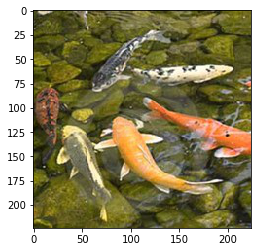

In [69]:
plt.imshow(np.asarray(Image.open(images[1])))

In [70]:
real_images = np.array([np.asarray(Image.open(image)) / 255 for image in images])
# real_images = np.array([image.flatten() for image in real_images])
real_images.shape

(20, 224, 224, 3)

In [0]:
target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content

In [0]:
lookup = [target.strip() for target in str(target_map).split('\\n')]

In [71]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
module

In [0]:
logits = module(real_images)

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    codes = []
    for i in range(NUM_IMAGES):
        codes.append(np.argmax(logits[i].eval()))

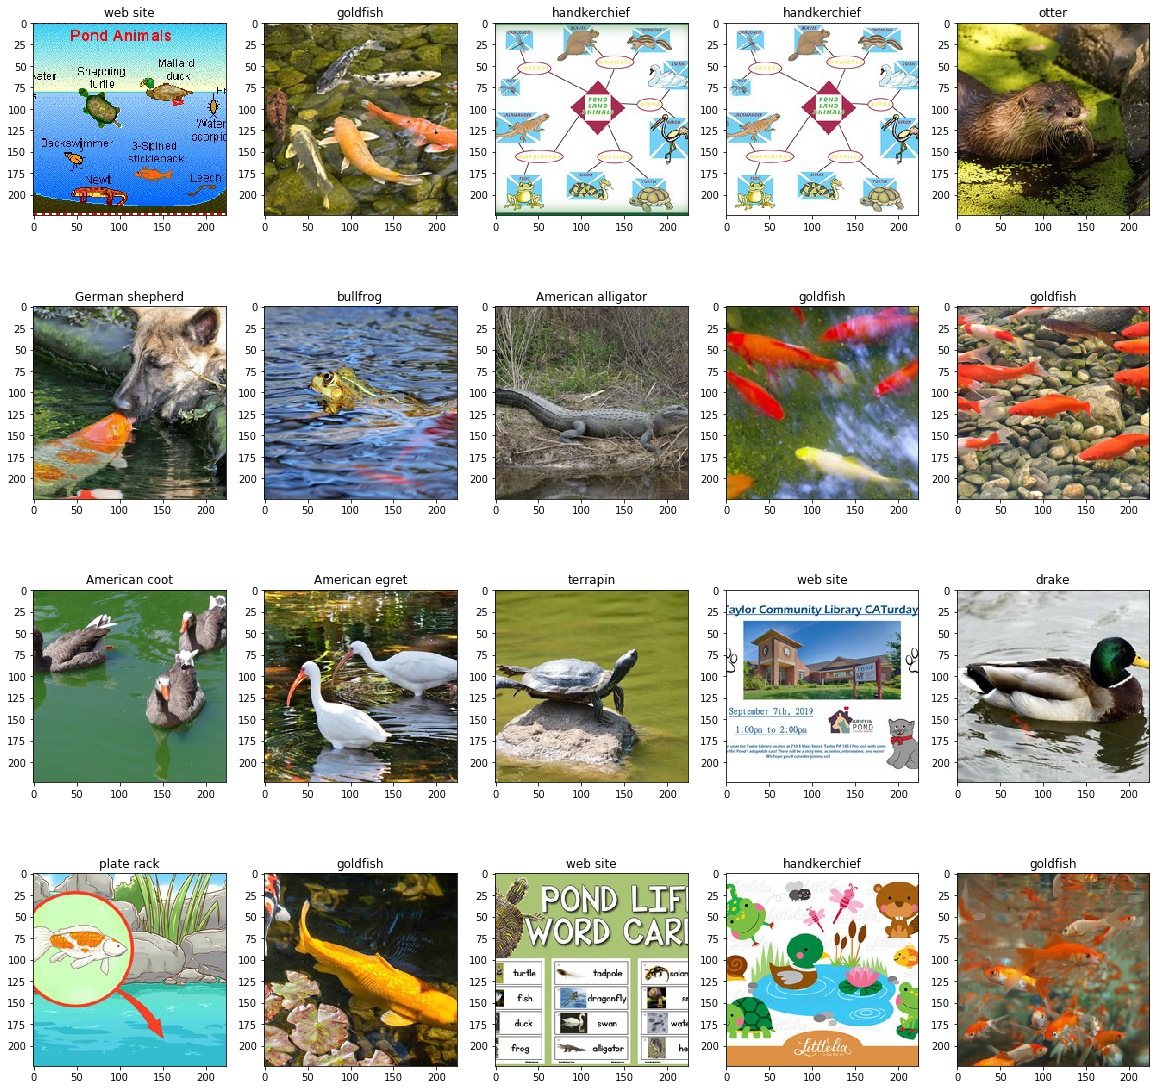

In [75]:
import math
cols = 5
rows = math.ceil(len(images)/5)
fig=plt.figure(figsize=(20, 20))
with tf.Session() as sess:
    for idx,image in enumerate(real_images):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(image)
        plt.title(lookup[codes[idx]])
plt.savefig('animals.jpg', dpi=120)
plt.show()

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
# TODO - your code!


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

Autoencoders are cool for dimensionality reduction, similar to, but often superior to PCA. They are also good for anomaly detection and feature engineering. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

    Probably programming?
- What area of Data Science would you most like to learn more about, and why?

    Kinda everything. Feel like I've scratched the surface so far.
- Where do you think Data Science will be in 5 years?

    A lot more formalized and siloed, unfortunately.
- What are the threats posed by AI to our society?

    Increasing the already obscene wealth inequality.
- How do you think we can counteract those threats? 

    Workers unite! Seize the means of production!!
- Do you think achieving General Artifical Intelligence is ever possible?

    Nah.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")